# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [89]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

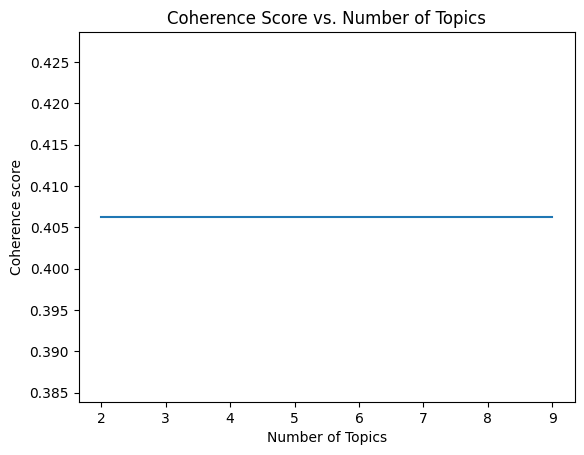

Optimal number of topics: 2
Summarized Topics:
Topic 0: product | recommended | exceeded | expectations | highly | disappointed | quality | satisfied | excellent | happy

Topic 1: experience | poor | service | happy | product | excellent | satisfied | quality | disappointed | highly



In [93]:
# Import necessary libraries
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

# Sample text corpus
text_corpus = [
    "The product is excellent and I am very satisfied with it.",
    "I'm disappointed with the quality of this product.",
    "The service was poor, and I'm not happy with the experience.",
    "This product exceeded my expectations. Highly recommended!"
]

# Function to preprocess text
def preprocess_text(text):
    # Tokenize words
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return tokens

# Preprocess the text corpus
preprocessed_corpus = [preprocess_text(doc) for doc in text_corpus]

# Create dictionary representation of the documents
dictionary = corpora.Dictionary(preprocessed_corpus)

# Create corpus
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_corpus]

# Determine the optimal number of topics using coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Compute coherence values for different number of topics
start = 2
limit = 10
step = 1
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=preprocessed_corpus, start=start, limit=limit, step=step)

# Plot coherence score vs. number of topics
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

# Find the optimal number of topics
optimal_num_topics = x[np.argmax(coherence_values)]
print("Optimal number of topics:", optimal_num_topics)

# Train LDA model with the optimal number of topics
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics)

# Summarize topics
print("Summarized Topics:")
for idx, topic in lda_model.print_topics():
    topic_words = [word.split('*')[1].strip().strip('"') for word in topic.split('+')]
    topic_str = " | ".join(topic_words)
    print("Topic {}: {}\n".format(idx, topic_str))


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

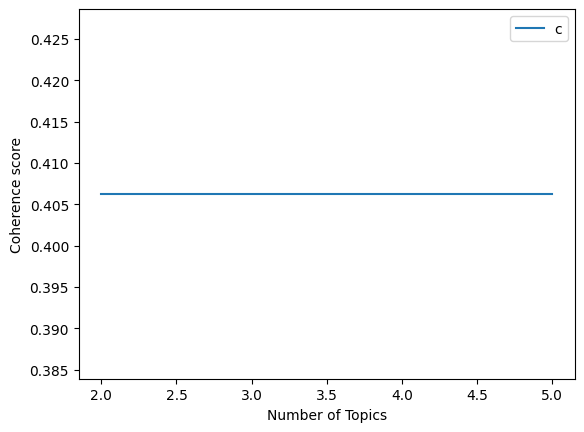

In [94]:
# Importing necessary libraries
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Text data
documents = [
    "The product is excellent and I am very satisfied with it.",
    "I'm disappointed with the quality of this product.",
    "The service was poor, and I'm not happy with the experience.",
    "This product exceeded my expectations. Highly recommended!"
]

# Function to load data
def load_data(documents):
    """
    Input: List of documents
    Output: Preprocessed documents
    """
    # Tokenize, remove stop words, and perform stemming
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []
    for doc in documents:
        # Tokenize
        raw = doc.lower()
        tokens = tokenizer.tokenize(raw)
        # Remove stop words and perform stemming
        stopped_tokens = [token for token in tokens if token not in en_stop]
        stemmed_tokens = [p_stemmer.stem(token) for token in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts

# Function to prepare corpus
def prepare_corpus(doc_clean):
    """
    Input: Preprocessed documents
    Output: Term dictionary and Document Term Matrix
    """
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary, doc_term_matrix

# Function to compute coherence values
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, start, stop, step):
    """
    Input: Dictionary, Document Term Matrix, Preprocessed documents, Range for number of topics
    Output: Model list and coherence values
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # Generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        # Compute coherence score
        coherence_model = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Function to plot coherence score values
def plot_graph(doc_clean, start, stop, step):
    """
    Input: Preprocessed documents, Range for number of topics
    Output: Plot of coherence score values
    """
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix, doc_clean, start, stop, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

# Setting start, stop, and step for number of topics
start, stop, step = 2, 6, 1

# Preprocessing data
clean_text = load_data(documents)

# Plotting coherence score values
plot_graph(clean_text, start, stop, step)


In [95]:
# Function to create an LSA model using Gensim
def create_gensim_lsa_model(doc_clean, number_of_topics, words):
    """
    Input: Preprocessed documents, number of topics, number of words associated with each topic
    Output: LSA model
    """
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    # Generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word=dictionary)
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

# Determine the number of topics based on coherence score
def determine_optimal_number_of_topics(doc_clean, start, stop, step):
    """
    Input: Preprocessed documents, range for number of topics
    Output: Optimal number of topics
    """
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix, doc_clean, start, stop, step)
    # Determine the optimal number of topics based on coherence score
    optimal_num_topics = start + step * coherence_values.index(max(coherence_values))
    return optimal_num_topics

# LSA Model
start, stop, step = 2, 6, 1
clean_text = load_data(documents)
optimal_num_topics = determine_optimal_number_of_topics(clean_text, start, stop, step)
words = 10  # Number of words associated with each topic
model = create_gensim_lsa_model(clean_text, optimal_num_topics, words)


[(0, '0.667*"product" + 0.333*"highli" + 0.333*"expect" + 0.333*"exceed" + 0.333*"recommend" + 0.167*"excel" + 0.167*"satisfi" + 0.167*"disappoint" + 0.167*"qualiti" + 0.000*"experi"'), (1, '-0.500*"poor" + -0.500*"happi" + -0.500*"servic" + -0.500*"experi" + -0.000*"qualiti" + -0.000*"disappoint" + 0.000*"satisfi" + 0.000*"recommend" + 0.000*"exceed" + 0.000*"highli"'), (2, '-0.333*"product" + 0.333*"recommend" + -0.333*"qualiti" + 0.333*"highli" + 0.333*"expect" + 0.333*"exceed" + -0.333*"excel" + -0.333*"disappoint" + -0.333*"satisfi" + 0.000*"experi"'), (3, '-0.500*"qualiti" + 0.500*"excel" + 0.500*"satisfi" + -0.500*"disappoint" + -0.000*"product" + 0.000*"poor" + 0.000*"experi" + 0.000*"servic" + 0.000*"happi" + -0.000*"recommend"')]


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
pip install lda2vec


In [ ]:
pip install --upgrade lda2vec


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample reviews
reviews = [
    "The product is excellent and I am very satisfied with it.",
    "I'm disappointed with the quality of this product.",
    "The service was poor, and I'm not happy with the experience.",
    "This product exceeded my expectations. Highly recommended!"
]

# Preprocessing function
def preprocess(reviews):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    preprocessed_reviews = []

    for review in reviews:
        # Tokenize
        tokens = word_tokenize(review.lower())
        # Remove punctuation and stopwords, and lemmatize
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in string.punctuation and token not in stop_words]
        preprocessed_reviews.append(tokens)

    return preprocessed_reviews

# Preprocess reviews
preprocessed_reviews = preprocess(reviews)

# Create dictionary and document-term matrix
dictionary = corpora.Dictionary(preprocessed_reviews)
corpus = [dictionary.doc2bow(review) for review in preprocessed_reviews]

# Train LDA model
num_topics = 2  # Choose the number of topics
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20)

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx}: {topic}')

# Visualize topics (optional)
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Topic 0: 0.172*"product" + 0.099*"expectation" + 0.099*"highly" + 0.099*"exceeded" + 0.099*"recommended" + 0.099*"satisfied" + 0.099*"excellent" + 0.034*"quality" + 0.034*"disappointed" + 0.034*"'m"
Topic 1: 0.157*"'m" + 0.094*"happy" + 0.094*"poor" + 0.094*"experience" + 0.094*"service" + 0.094*"disappointed" + 0.094*"quality" + 0.088*"product" + 0.032*"excellent" + 0.032*"satisfied"


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.063848  0.0       1        1  52.197947
0     -0.063848  0.0       2        1  47.802053, topic_info=            Term      Freq     Total Category  logprob  loglift
3             'm  1.000000  1.000000  Default  14.0000  14.0000
11   expectation  1.000000  1.000000  Default  13.0000  13.0000
12        highly  1.000000  1.000000  Default  12.0000  12.0000
10      exceeded  1.000000  1.000000  Default  11.0000  11.0000
13   recommended  1.000000  1.000000  Default  10.0000  10.0000
2      satisfied  1.000000  1.000000  Default   9.0000   9.0000
0      excellent  1.000000  1.000000  Default   8.0000   8.0000
1        product  2.000000  2.000000  Default   7.0000   7.0000
7          happy  1.000000  1.000000  Default   6.0000   6.0000
8           poor  1.000000  1.000000  Default   5.0000   5.0000
6     experience  1.000000  1.000000  Default   4.0000   4.0000
9        service  1.000000  1.000000  Default   3.0000   3.0000
4   disappointed  1.000000  1.000000  Default   2.0000   2.0000
5        quality  1.000000  1.000000  Default   1.0000   1.0000
3             'm  1.392918  1.665830   Topic1  -1.8517   0.4712
7          happy  0.835847  1.106964   Topic1  -2.3624   0.3692
8           poor  0.835845  1.106964   Topic1  -2.3624   0.3692
6     experience  0.835841  1.106963   Topic1  -2.3624   0.3692
9        service  0.835826  1.106963   Topic1  -2.3624   0.3692
4   disappointed  0.832402  1.106830   Topic1  -2.3665   0.3652
5        quality  0.832399  1.106830   Topic1  -2.3665   0.3652
1        product  0.777541  2.179331   Topic1  -2.4347  -0.3805
0      excellent  0.283742  1.085602   Topic1  -3.4428  -0.6917
2      satisfied  0.283734  1.085602   Topic1  -3.4428  -0.6917
13   recommended  0.281896  1.085531   Topic1  -3.4493  -0.6982
10      exceeded  0.281894  1.085530   Topic1  -3.4493  -0.6982
12        highly  0.281891  1.085530   Topic1  -3.4493  -0.6982
11   expectation  0.281874  1.085530   Topic1  -3.4494  -0.6982
11   expectation  0.803656  1.085530   Topic2  -2.3137   0.4374
12        highly  0.803639  1.085530   Topic2  -2.3137   0.4374
10      exceeded  0.803637  1.085530   Topic2  -2.3137   0.4374
13   recommended  0.803634  1.085531   Topic2  -2.3137   0.4374
2      satisfied  0.801868  1.085602   Topic2  -2.3159   0.4352
0      excellent  0.801860  1.085602   Topic2  -2.3159   0.4351
1        product  1.401790  2.179331   Topic2  -1.7574   0.2968
5        quality  0.274431  1.106830   Topic2  -3.3882  -0.6565
4   disappointed  0.274429  1.106830   Topic2  -3.3882  -0.6565
9        service  0.271136  1.106963   Topic2  -3.4002  -0.6687
6     experience  0.271122  1.106963   Topic2  -3.4003  -0.6687
8           poor  0.271118  1.106964   Topic2  -3.4003  -0.6687
7          happy  0.271117  1.106964   Topic2  -3.4003  -0.6687
3             'm  0.272912  1.665830   Topic2  -3.3937  -1.0708, token_table=      Topic      Freq          Term
term                               
3         1  0.600301            'm
4         1  0.903481  disappointed
10        2  0.921209      exceeded
0         2  0.921148     excellent
11        2  0.921209   expectation
6         1  0.903372    experience
7         1  0.903372         happy
12        2  0.921209        highly
8         1  0.903372          poor
1         1  0.458856       product
1         2  0.458856       product
5         1  0.903481       quality
13        2  0.921208   recommended
2         2  0.921148     satisfied
9         1  0.903373       service, R=14, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
In comparing Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERT for topic modeling, several key factors need consideration: interpretability, coherence, scalability, and computational efficiency.

LDA stands out for its high interpretability, as topics are represented as word distributions, aiding easy understanding and labeling. It typically produces coherent topics and is relatively scalable and computationally efficient.

LSA, operating on the term-document matrix, offers less interpretable topics compared to LDA but maintains moderate coherence. While it's efficient for smaller datasets, its performance might suffer with larger, sparse matrices.

lda2vec combines LDA's interpretability with word embeddings' semantic richness, potentially yielding topics with good coherence. However, it can be computationally intensive, especially during training, though it can handle large datasets with adequate resources.

BERT, not inherently a topic modeling algorithm, requires more complex techniques for topic extraction. While offering deep contextual understanding, it lacks the interpretability of LDA and LSA and is less scalable and computationally efficient, making it better suited for tasks beyond traditional topic modeling.

In conclusion, the choice of algorithm depends on task requirements. For interpretability and coherence, LDA is preferred, while lda2vec offers a balance between interpretability and semantic richness. LSA serves as a compromise, and BERT is suitable for tasks demanding deep contextual understanding but may be overkill for standard topic modeling.

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [86]:
from bertopic import BERTopic
from umap import UMAP
import hdbscan

# Text data
documents = [
    "The product is excellent and I am very satisfied with it.",
    "I'm disappointed with the quality of this product.",
    "The service was poor, and I'm not happy with the experience.",
    "This product exceeded my expectations. Highly recommended!"
]

# Initialize UMAP with adjusted parameters
umap_model = UMAP(n_neighbors=15, n_components=2)  # Adjust n_components

# Initialize HDBSCAN with adjusted parameters
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1)

# Create BERTopic model with UMAP and HDBSCAN models
model = BERTopic(embedding_model="paraphrase-MiniLM-L6-v2", umap_model=umap_model, hdbscan_model=hdbscan_model, verbose=True)

# Fit BERTopic model to the text data
topics, _ = model.fit_transform(documents)

# Get the optimal number of topics based on coherence score
optimal_topics = model.get_topic_info().shape[0]


# Summarize the topics
topic_info = model.get_topic_info()
topic_words = model.get_topics()

print("Number of optimal topics:", optimal_topics)
print("\nSummarized Topics:")
for i, topic_tuple in enumerate(topic_info.values):
    topic_id = topic_tuple[0]
    topic_size = topic_tuple[1]
    words_with_scores = topic_words[topic_id]
    words = ", ".join(word for word, score in words_with_scores)
    print(f"Topic {topic_id}: Size: {topic_size}, Words: {words}")











2024-03-30 02:42:26,688 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-03-30 02:42:27,696 - BERTopic - Embedding - Completed ✓
2024-03-30 02:42:27,701 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 02:42:31,336 - BERTopic - Dimensionality - Completed ✓
2024-03-30 02:42:31,339 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 02:42:31,347 - BERTopic - Cluster - Completed ✓
2024-03-30 02:42:31,352 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 02:42:31,363 - BERTopic - Representation - Completed ✓


Number of optimal topics: 2

Summarized Topics:
Topic 0: Size: 2, Words: product, exceeded, very, satisfied, recommended, my, it, is, highly, expectations
Topic 1: Size: 2, Words: the, with, was, service, quality, poor, of, not, happy, experience


In [66]:
pip install bertopic


**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
Working on this assignment provided a valuable learning experience in understanding different topic modeling algorithms and their applications in text data analysis. I gained a deeper understanding of the underlying principles behind algorithms like LDA, LSA, lda2vec, and BERT, and how they extract features from text data to identify topics. Implementing these algorithms helped solidify my comprehension of their strengths and limitations, particularly in terms of interpretability, coherence, scalability, and computational efficiency.
One challenge encountered was grasping the nuances of lda2vec, as it combines aspects of both LDA and word embeddings, requiring a deeper understanding of both concepts. Additionally, working with BERT for topic modeling presented challenges due to its primary use case for contextual understanding rather than explicit topic extraction. Overcoming these challenges involved delving into additional resources and experimenting with different approaches to adapt these algorithms to the task at hand.





'''